## import libraries and dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('HousingData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [34]:
df.duplicated().sum()

0

In [35]:
df.CHAS = df.CHAS.astype(str)
df.CHAS = df.CHAS.replace('0.0', '0')
df.CHAS = df.CHAS.replace('1.0', '1')

df.CHAS = df.CHAS.replace('nan', np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 55.5+ KB


## Filling missing values with mode

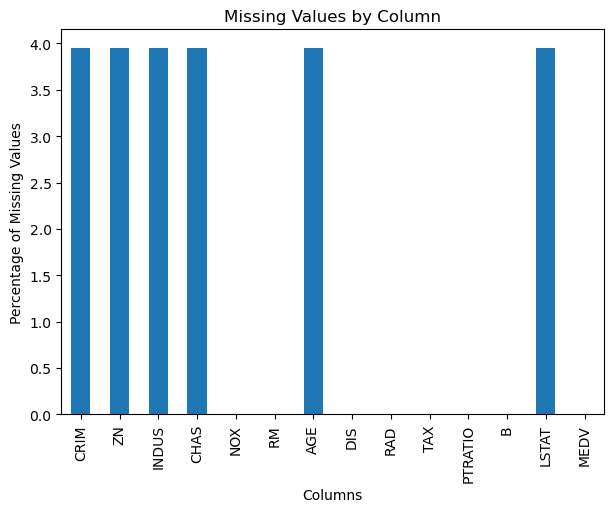

In [36]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a bar chart
plt.figure(figsize=(7, 5))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values by Column')
plt.show()

In [37]:
for k, mv in df.items():
    missing_percentage = (mv.isnull().sum() / len(mv)) * 100
    print(f"{k} has {missing_percentage:.2f}% missing values")

CRIM has 3.95% missing values
ZN has 3.95% missing values
INDUS has 3.95% missing values
CHAS has 3.95% missing values
NOX has 0.00% missing values
RM has 0.00% missing values
AGE has 3.95% missing values
DIS has 0.00% missing values
RAD has 0.00% missing values
TAX has 0.00% missing values
PTRATIO has 0.00% missing values
B has 0.00% missing values
LSTAT has 3.95% missing values
MEDV has 0.00% missing values


In [38]:
df['CRIM'].fillna(df['CRIM'].mode()[0], inplace = True)
df.CRIM.isna().sum()

0

In [39]:
df['ZN'].fillna(df['ZN'].mode()[0], inplace = True)
df.ZN.isna().sum()

0

In [40]:
df['INDUS'].fillna(df['INDUS'].mode()[0], inplace = True)
df.INDUS.isna().sum()

0

In [41]:
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace = True)
df.CHAS.isna().sum()

0

In [42]:
df['AGE'].fillna(df['AGE'].mode()[0], inplace = True)
df.AGE.isna().sum()

0

In [43]:
df['LSTAT'].fillna(df['LSTAT'].mode()[0], inplace = True)
df.LSTAT.isna().sum()

0

In [44]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [45]:
df.to_csv('hd3_FMV_mode.csv', index=False)